<a href="https://colab.research.google.com/github/aoneko92/Prefectural_politician_speeches/blob/main/JapPol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#POS-tagger

# グラフに日本語フォントで出力するには

一番簡単なのは，japanize-matplotlib を使う方法です．

### インストール

~~~ 
!pip install japanize-matplotlib
~~~

### 使い方

~~~
import matplotlib.pyplot as plt
import japanize_matplotlib 
~~~

pip インストールは japanize-matplotlib とハイフンなのに，import はアンダースコアであることに注意


In [ ]:
!pip install japanize-matplotlib

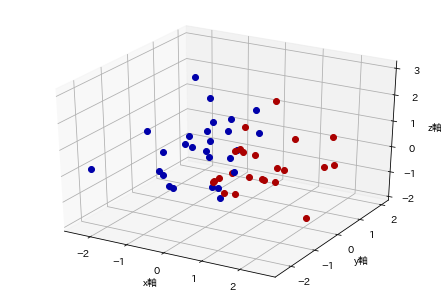

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


def main():
    # 乱数を50個生成して x とする。y, z も同様
    x = np.random.randn(50)
    y = np.random.randn(50)
    z = np.random.randn(50)
    # 3Dでプロット
    fig = plt.figure()
    ax = Axes3D(fig)
    for x1,y1,z1 in zip(x,y,z):
        if x1 < 0:
            ax.plot([x1], [y1], [z1], "o", color="#0000aa")
        else:
            ax.plot([x1], [y1], [z1], "o", color="#aa0000")

    # 軸のラベルを設定 
    ax.set_xlabel('x軸')
    ax.set_ylabel('y軸')
    ax.set_zlabel('z軸')
    # 表示
    plt.show() # Colaboratory では不要
    
main()

以下はグラフで日本語フォントを使う第２の方法です．
上の方法との併用はできません．

---



# グラフに日本語フォントで出力するには（別の方法）
ひと手間、いや、３手間ほど必要になります。


1.    !apt-get -y install fonts-ipafont-gothic  で日本語フォントを導入
2.   !rm  -r  /root/.cache/matplotlib
3.   ランタイムを再起動


### 補足
なお、フォントキャッシュのディレクトリは次のようにして確認できる。
```
import matplotlib
matplotlib.get_cachedir()
```

２のステップで、fontList.json を削除すると書かれているサイトが多いのだが、fontList.json はなかったり、あったりするので、matplotlib ごと削除してみたらうまくいった。弊害があるかもしれない。



In [ ]:
#!rm /content/.cache/matplotlib/fontList.json
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 67 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 3s (2,638 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 155203 files and directories currently installed.)
Preparing 

In [ ]:
!ls /root/.cache/matplotlib
!rm -r /root/.cache/matplotlib

fontlist-v310.json  tex.cache


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['font.family'] = 'IPAPGothic'


def main():
    # 乱数を50個生成して x とする。y, z も同様
    x = np.random.randn(50)
    y = np.random.randn(50)
    z = np.random.randn(50)
    # 3Dでプロット
    fig = plt.figure()
    ax = Axes3D(fig)
    for x1,y1,z1 in zip(x,y,z):
        if x1 < 0:
            ax.plot([x1], [y1], [z1], "o", color="#0000aa")
        else:
            ax.plot([x1], [y1], [z1], "o", color="#aa0000")
    # jp_font = {'fontname':'IPAGothic'}
    # plt.rcParams['font.family'] = 'HGMaruGothicMPRO'
    # plt.rcParams['font.family'] = 'IPAGothic' # 日本語フォントを指定
    # 軸のラベルを設定 
    ax.set_xlabel('x軸')
    ax.set_ylabel('y軸')
    ax.set_zlabel('z軸')
    # 表示
    plt.show()

findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36600 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 36600 missing from current font.
  font.set_text(s, 0, flags=flags)


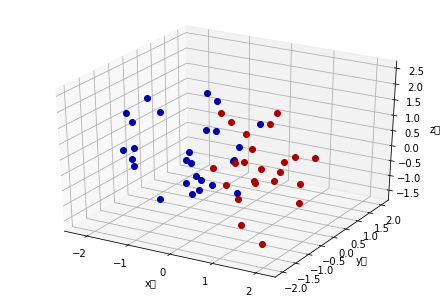

In [ ]:
main()

In [ ]:
!ls /root/.cache/matplotlib

ls: cannot access '/root/.cache/matplotlib': No such file or directory


If you just want segmented text.

In [ ]:
!pip install fugashi[unidic-lite]

import fugashi

# This is our sample text.
text = "麩菓子は、麩を主材料とした日本の菓子。"

# Initializing the tagger
tagger = fugashi.Tagger()

words = [word.surface for word in tagger(text)]
print(*words)
# => 麩 菓子 は 、 麩 を 主材 料 と し た 日本 の 菓子 。

麩 菓子 は 、 麩 を 主材 料 と し た 日本 の 菓子 。


In [ ]:

text = "麩を用いた菓子は江戸時代からすでに存在していた。"

print("input:", text)
for word in tagger(text):
    # feature is a named tuple holding all the Unidic info
    print(word.surface, word.feature.lemma, sep="\t")

input: 麩を用いた菓子は江戸時代からすでに存在していた。
麩	麩
を	を
用い	用いる
た	た
菓子	菓子
は	は
江戸	エド
時代	時代
から	から
すでに	既に
存在	存在
し	為る
て	て
い	居る
た	た
。	。


###Here's where the real stuff starts


In [ ]:
!pip install mecab-python3

In [ ]:
!pip install sortedcontainers==2.1.0
!pip install SudachiPy

In [ ]:
import spacy
ja = spacy.blank('ja')
for word in ja('日本語ですよ'): #testing
    print(word, word.lemma_, word.tag_, word.pos_)

日本 日本 名詞-固有名詞-地名-国 PROPN
語 語 名詞-普通名詞-一般 NOUN
です です 助動詞 AUX
よ よ 助詞-終助詞 PART


In [ ]:
import pandas as pd
temp = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/aichi_combined_apr7.csv")
temptext = temp["corpus"]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
nlp.max_length = 3606000 # or higher
for f in files:
  string = '' #we're "emptying" this for each file
  with open(f,'r')as temp: #we're opening each fle one by one for reading
    temptxt = temp.read()
    for word in ja(temptxt): #for each japanese word in the current file
      string += str(word)+'_'+str(word.pos_)+' ' #append both word and pos to "string"
  #print(string)
  with open('output.txt','a') as out:#this APPENDS to the file so all the separate input files will be joined in one output file
    out.write(string)


NameError: ignored

Here. This. For POS tags.

In [ ]:
pos = []

for text in temptext:
  string = ''
  for word in ja(text):
    string += str(word)+'_'+str(word.pos_)+' ' #append both word and pos to "string" 
  pos.append(string)

In [ ]:

tag = []


for text in temptext:
  string = ''
  for word in ja(text):
    string += str(word)+'_'+str(word.tag_)+' ' #append both word and pos to "string" 
  tag.append(string) 

  #word, word.lemma_, word.tag_, word.pos_

In [ ]:

temp['POS'] = pos

temp.tail(10)

,Unnamed: 0,Unnamed: 0_x,V1,corpus,name,type,date,year,Unnamed: 0_y,year_merge,...,un_dummy,m_99,m_95,m_91,m_87,un_8799,un_full,un_full_na_op1,un_full_na_op2,POS
12173,404,0,【安井伸治委員】,【安井伸治委員】不祥事が１件起こるたびに、教育の信頼性、生徒、教師、保護者の信頼関係が崩れて...,安井伸治,平成27年文教委員会 本文,2015-10-06,2015.0,684527,2015,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,【_PUNCT 安井_PROPN 伸治_PROPN 委員_NOUN 】_PUNCT 不祥_N...
12174,416,0,【安井伸治委員】,【安井伸治委員】地域未来塾は、地域の活力を教育にも生かしていくという事業であり、活性化にもつ...,安井伸治,平成27年文教委員会 本文,2015-10-06,2015.0,684527,2015,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,【_PUNCT 安井_PROPN 伸治_PROPN 委員_NOUN 】_PUNCT 地域_N...
12175,572,0,【安井伸治委員】,【安井伸治委員】公職選挙法が改正され、選挙権年齢が18歳以上に引き下げられたことに伴い、高校...,安井伸治,平成27年文教委員会 本文,2015-06-30,2015.0,684533,2015,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,【_PUNCT 安井_PROPN 伸治_PROPN 委員_NOUN 】_PUNCT 公職_N...
12176,584,0,【安井伸治委員】,【安井伸治委員】さきの衆議院議員選挙だと、５歳ごとの年代別で20歳から24歳までは投票率37...,安井伸治,平成27年文教委員会 本文,2015-06-30,2015.0,684533,2015,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,【_PUNCT 安井_PROPN 伸治_PROPN 委員_NOUN 】_PUNCT さき_N...
12177,596,0,【安井伸治委員】,【安井伸治委員】若い世代が政治や社会、また、国に対して前向きに考え、自分が関わっていく姿勢を...,安井伸治,平成27年文教委員会 本文,2015-06-30,2015.0,684533,2015,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,【_PUNCT 安井_PROPN 伸治_PROPN 委員_NOUN 】_PUNCT 若い_A...
12178,608,0,【安井伸治委員】,【安井伸治委員】オリンピックの話が出たが、パラリンピック等障害スポーツで上位に入った者も対象...,安井伸治,平成27年文教委員会 本文,2015-06-30,2015.0,684533,2015,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,【_PUNCT 安井_PROPN 伸治_PROPN 委員_NOUN 】_PUNCT オリンピ...
12179,620,0,【安井伸治委員】,【安井伸治委員】特別選考で採用された教員は、それが生きるような人事配置をしていくことが、その...,安井伸治,平成27年文教委員会 本文,2015-06-30,2015.0,684533,2015,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,【_PUNCT 安井_PROPN 伸治_PROPN 委員_NOUN 】_PUNCT 特別_A...
12180,632,0,【安井伸治委員】,【安井伸治委員】スポーツ推薦など、一芸に秀でた者が大学に入学するパターンが非常に多くなってき...,安井伸治,平成27年文教委員会 本文,2015-06-30,2015.0,684533,2015,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,【_PUNCT 安井_PROPN 伸治_PROPN 委員_NOUN 】_PUNCT スポーツ...
12181,788,0,◯十六番（安井伸治君）,◯十六番（安井伸治君） 議長のお許しをいただきましたので、通告に従いまして、順次質問をさせて...,安井伸治,平成27年６月定例会（第４号） 本文,2015-06-24,2015.0,684539,2015,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,◯_SYM 十六_NUM 番_NOUN （_PUNCT 安井_PROPN 伸治_PROPN ...
12182,790,0,◯十六番（安井伸治君）,◯十六番（安井伸治君） それぞれ御答弁ありがとうございました。順次要望させていただきます。ま...,安井伸治,平成27年６月定例会（第４号） 本文,2015-06-24,2015.0,684539,2015,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,◯_SYM 十六_NUM 番_NOUN （_PUNCT 安井_PROPN 伸治_PROPN ...


In [ ]:
temp['TAG'] = tag

In [ ]:
temp.to_csv(r'/content/drive/MyDrive/Colab Notebooks/aichi.csv')

#CORPUS stuff

In [ ]:
#the data is in a dataframe called temp
import pandas as pd
import nltk
temp = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/aichi.csv')
#to use with antconc download post-json_corr.txt (posts only, no other info)
temp.head(2) #to view


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (39) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0_x,V1,corpus,name,type,date,year,Unnamed: 0_y,...,m_99,m_95,m_91,m_87,un_8799,un_full,un_full_na_op1,un_full_na_op2,POS,TAG
0,0,0,0,【伊藤勝人委員】,【伊藤勝人委員】緊急で本事業の補正予算を審議するわけだが、蔓延が広がらないように、少しでも陽...,伊藤勝人,令和３年福祉医療委員会 本文,2021-05-27,2021.0,690064,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,【_PUNCT 伊藤_PROPN 勝人_PROPN 委員_NOUN 】_PUNCT 緊急_A...,【_補助記号-括弧開 伊藤_名詞-固有名詞-人名-姓 勝人_名詞-固有名詞-人名-名 委員_...
1,1,4,0,【伊藤勝人委員】,【伊藤勝人委員】本県は東京都や大阪府よりも新規陽性者数が多い状況で、一生懸命やっていることに...,伊藤勝人,令和３年福祉医療委員会 本文,2021-05-27,2021.0,690064,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,【_PUNCT 伊藤_PROPN 勝人_PROPN 委員_NOUN 】_PUNCT 本_NO...,【_補助記号-括弧開 伊藤_名詞-固有名詞-人名-姓 勝人_名詞-固有名詞-人名-名 委員_...


In [ ]:
#cleanup
temp = temp.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0_x'],axis=1)

In [ ]:
temp.head()

,V1,corpus,name,type,date,year,Unnamed: 0_y,year_merge,pref_id,X.1,...,m_99,m_95,m_91,m_87,un_8799,un_full,un_full_na_op1,un_full_na_op2,POS,TAG
0,【伊藤勝人委員】,【伊藤勝人委員】緊急で本事業の補正予算を審議するわけだが、蔓延が広がらないように、少しでも陽...,伊藤勝人,令和３年福祉医療委員会 本文,2021-05-27,2021.0,690064,2015,23,719446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,【_PUNCT 伊藤_PROPN 勝人_PROPN 委員_NOUN 】_PUNCT 緊急_A...,【_補助記号-括弧開 伊藤_名詞-固有名詞-人名-姓 勝人_名詞-固有名詞-人名-名 委員_...
1,【伊藤勝人委員】,【伊藤勝人委員】本県は東京都や大阪府よりも新規陽性者数が多い状況で、一生懸命やっていることに...,伊藤勝人,令和３年福祉医療委員会 本文,2021-05-27,2021.0,690064,2015,23,719446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,【_PUNCT 伊藤_PROPN 勝人_PROPN 委員_NOUN 】_PUNCT 本_NO...,【_補助記号-括弧開 伊藤_名詞-固有名詞-人名-姓 勝人_名詞-固有名詞-人名-名 委員_...
2,【伊藤勝人委員】,【伊藤勝人委員】今、議論しているのは感染を防ぐことである。県民の安全・安心な生活ではない。成...,伊藤勝人,令和３年福祉医療委員会 本文,2021-05-27,2021.0,690064,2015,23,719446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,【_PUNCT 伊藤_PROPN 勝人_PROPN 委員_NOUN 】_PUNCT 今_NO...,【_補助記号-括弧開 伊藤_名詞-固有名詞-人名-姓 勝人_名詞-固有名詞-人名-名 委員_...
3,【伊藤勝人委員】,【伊藤勝人委員】生活衛生同業組合に支援金を出すと人と人の接触が減るのか。各論で行き過ぎた気が...,伊藤勝人,令和３年福祉医療委員会 本文,2021-05-27,2021.0,690064,2015,23,719446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,【_PUNCT 伊藤_PROPN 勝人_PROPN 委員_NOUN 】_PUNCT 生活_N...,【_補助記号-括弧開 伊藤_名詞-固有名詞-人名-姓 勝人_名詞-固有名詞-人名-名 委員_...
4,【伊藤勝人委員】,（主な質疑）《議案関係》【伊藤勝人委員】団塊の世代が2025年に後期高齢者になる中で、医療ニ...,伊藤勝人,令和３年福祉医療委員会 本文,2021-03-16,2021.0,690068,2015,23,719450,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,（_PUNCT 主な_DET 質疑_NOUN ）_PUNCT 《_PUNCT 議案_NOUN...,（_補助記号-括弧開 主な_連体詞 質疑_名詞-普通名詞-サ変可能 ）_補助記号-括弧閉 《...


In [ ]:
pos = temp['POS'].tolist()
tag = temp['TAG'].tolist()
db = []

#print(pos[345:347])
#postlist = [p.split('_') for p in pos]
for p in pos:
  p = str(p)
  data = p.split(' ')
  #print(data)
  ind_post = []
  for d in data:
    pair = d.split('_')
    #print(pair)
    #t_data = list(zip(pair, pair))#list(zip(pair[::2],pair[1::2]))
    try:
      ind_post.append((pair[0],pair[1]))
    except IndexError:
      ind_post.append((pair[0],'notag'))
      print(pair)

  db.append(ind_post)


Streaming output truncated to the last 5000 lines.
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']

In [ ]:
print(db[654:657])

[[('◯', 'SYM'), ('議長', 'NOUN'), ('（', 'PUNCT'), ('青山', 'PROPN'), ('秋男', 'PROPN'), ('君', 'NOUN'), ('）', 'PUNCT'), ('\u3000', 'X'), ('各', 'NOUN'), ('委員', 'NOUN'), ('長', 'NOUN'), ('の', 'ADP'), ('申し出', 'NOUN'), ('の', 'ADP'), ('とおり', 'NOUN'), ('決し', 'VERB'), ('まし', 'AUX'), ('て', 'SCONJ'), ('御', 'NOUN'), ('異議', 'NOUN'), ('あり', 'AUX'), ('ませ', 'AUX'), ('ん', 'AUX'), ('か', 'PART'), ('。', 'PUNCT'), ('〔', 'PUNCT'), ('「', 'PUNCT'), ('異議', 'NOUN'), ('なし', 'NOUN'), ('」', 'PUNCT'), ('と', 'ADP'), ('呼ぶ', 'VERB'), ('者', 'NOUN'), ('あり', 'AUX'), ('〕', 'PUNCT'), ('', 'notag')], [('◯', 'SYM'), ('議長', 'NOUN'), ('（', 'PUNCT'), ('青山', 'PROPN'), ('秋男', 'PROPN'), ('君', 'NOUN'), ('）', 'PUNCT'), ('\u3000', 'X'), ('御', 'NOUN'), ('異議', 'NOUN'), ('なし', 'NOUN'), ('と', 'ADP'), ('認め', 'VERB'), ('ます', 'AUX'), ('。', 'PUNCT'), ('よっ', 'VERB'), ('て', 'SCONJ'), ('、', 'PUNCT'), ('各', 'NOUN'), ('委員', 'NOUN'), ('長', 'NOUN'), ('の', 'ADP'), ('申し出', 'NOUN'), ('の', 'ADP'), ('とおり', 'NOUN'), ('閉会', 'NOUN'), ('中', 'NOUN'), ('の', 'ADP'),

In [ ]:

tag = temp['TAG'].tolist()
db_tag = []

#print(pos[345:347])
#postlist = [p.split('_') for p in pos]
for p in tag:
  p = str(p)
  data = p.split(' ')
  #print(data)
  ind_post = []
  for d in data:
    pair = d.split('_')
    #print(pair)
    #t_data = list(zip(pair, pair))#list(zip(pair[::2],pair[1::2]))
    try:
      ind_post.append((pair[0],pair[1]))
    except IndexError:
      ind_post.append((pair[0],'notag'))
      print(pair)

  db_tag.append(ind_post)

Streaming output truncated to the last 5000 lines.
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']

In [ ]:
adjlist = []
adj_count = []
for p in db:
  tag_fd = nltk.FreqDist(tag for (word, tag) in p) #if word not in stopwords)
  #print(tag_fd.most_common())
  adj_count.append(tag_fd['ADJ'])
  #adjlist = [word for (word,tag) in p if tag == 'ADJ']
  templist = []
  for (word,tag) in p:
    if tag == 'ADJ' or tag == 'ADV':
      templist.append(word)
  adjlist.append(templist)

In [ ]:
for p in db_tag:
  tag_fd = nltk.FreqDist(tag for (word, tag) in p) #if word not in stopwords)
  #print(tag_fd.most_common())

In [ ]:
adjlist_tag = []
adj_count_tag = []
for p in db_tag:
  tag_fd = nltk.FreqDist(tag for (word, tag) in p) #if word not in stopwords)
  #print(tag_fd.most_common())
  adj_count_tag_temp = []
  for key,val in tag_fd.items():
    if '形状詞' in key:
      adj_count_tag_temp.append(val)
  
  #adj_count_tag.append(tag_fd['ADJ'])
  #adjlist = [word for (word,tag) in p if tag == 'ADJ']
  templist = []
  for (word,tag) in p:
    if '形状詞' in tag or '副詞' in tag:
      templist.append(word)
  adjlist_tag.append(templist)
  adj_count_tag.append(adj_count_tag_temp)

In [ ]:
#adjlist_tag
adj_count_tag

[[2, 3],
 [3, 1],
 [1, 1, 1],
 [],
 [3, 1, 2, 3, 1],
 [],
 [1],
 [],
 [1],
 [2, 1, 1],
 [3, 1],
 [2, 1],
 [1],
 [],
 [1, 1],
 [],
 [],
 [],
 [],
 [],
 [],
 [1],
 [1, 1],
 [1, 1],
 [],
 [],
 [1, 1],
 [],
 [1],
 [1],
 [2, 1, 1],
 [],
 [1],
 [1, 2],
 [4, 3, 2, 3],
 [3, 2, 1],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [2, 2, 1],
 [],
 [],
 [],
 [],
 [],
 [],
 [1],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [1],
 [5],
 [],
 [2],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [3, 1, 1, 1],
 [1],
 [1],
 [1],
 [],
 [1],
 [7, 19, 6, 6, 7],
 [35, 38, 13, 18, 7],
 [10, 14, 1, 1, 3],
 [3, 13],
 [2, 8, 1],
 [5, 2, 2],
 [3],
 [4, 3, 1],
 [2, 1, 2, 3, 1],
 [35, 12, 37, 8, 9],
 [2, 1, 1],
 [1],
 [5],
 [1],
 [],
 [36, 18, 14, 10, 1],
 [3, 6, 1, 4],
 [],
 [],
 [2, 1],
 [1],
 [2, 1, 2],
 [1],
 [],
 [2, 1, 1],
 [1],
 [1, 2],
 [],
 [1],
 [1],
 [],


In [ ]:
temp['ADJ_count'] = adj_count
temp['ADJ_words'] = adjlist
temp['keiyoushi_count'] = adj_count_tag
temp['keiyoushi_words'] = adjlist_tag

In [ ]:
import itertools
print(len(list(itertools.chain.from_iterable(adj_count_tag))))

18317


In [ ]:
temp['TAG'][678:720].to_csv(r'/content/drive/MyDrive/Colab Notebooks/Amy_data/tag.csv')

In [ ]:
temp.head()

,V1,corpus,name,type,date,year,Unnamed: 0_y,year_merge,pref_id,X.1,...,un_8799,un_full,un_full_na_op1,un_full_na_op2,POS,TAG,ADJ_count,ADJ_words,keiyoushi_count,keiyoushi_words
0,【伊藤勝人委員】,【伊藤勝人委員】緊急で本事業の補正予算を審議するわけだが、蔓延が広がらないように、少しでも陽...,伊藤勝人,令和３年福祉医療委員会 本文,2021-05-27,2021.0,690064,2015,23,719446,...,0.0,0.0,0.0,0,【_PUNCT 伊藤_PROPN 勝人_PROPN 委員_NOUN 】_PUNCT 緊急_A...,【_補助記号-括弧開 伊藤_名詞-固有名詞-人名-姓 勝人_名詞-固有名詞-人名-名 委員_...,1,"[緊急, 少し]","[2, 3]","[緊急, よう, 少し, 陽性, よう, よう, ため]"
1,【伊藤勝人委員】,【伊藤勝人委員】本県は東京都や大阪府よりも新規陽性者数が多い状況で、一生懸命やっていることに...,伊藤勝人,令和３年福祉医療委員会 本文,2021-05-27,2021.0,690064,2015,23,719446,...,0.0,0.0,0.0,0,【_PUNCT 伊藤_PROPN 勝人_PROPN 委員_NOUN 】_PUNCT 本_NO...,【_補助記号-括弧開 伊藤_名詞-固有名詞-人名-姓 勝人_名詞-固有名詞-人名-名 委員_...,5,"[新規, 多い, 懸命, ない, 急激]","[3, 1]","[新規, 陽性, 一生, 懸命, 急激]"
2,【伊藤勝人委員】,【伊藤勝人委員】今、議論しているのは感染を防ぐことである。県民の安全・安心な生活ではない。成...,伊藤勝人,令和３年福祉医療委員会 本文,2021-05-27,2021.0,690064,2015,23,719446,...,0.0,0.0,0.0,0,【_PUNCT 伊藤_PROPN 勝人_PROPN 委員_NOUN 】_PUNCT 今_NO...,【_補助記号-括弧開 伊藤_名詞-固有名詞-人名-姓 勝人_名詞-固有名詞-人名-名 委員_...,2,"[ない, 明らか, どう]","[1, 1, 1]","[今, 安全, 安心, 明らか, どう]"
3,【伊藤勝人委員】,【伊藤勝人委員】生活衛生同業組合に支援金を出すと人と人の接触が減るのか。各論で行き過ぎた気が...,伊藤勝人,令和３年福祉医療委員会 本文,2021-05-27,2021.0,690064,2015,23,719446,...,0.0,0.0,0.0,0,【_PUNCT 伊藤_PROPN 勝人_PROPN 委員_NOUN 】_PUNCT 生活_N...,【_補助記号-括弧開 伊藤_名詞-固有名詞-人名-姓 勝人_名詞-固有名詞-人名-名 委員_...,0,[],[],[]
4,【伊藤勝人委員】,（主な質疑）《議案関係》【伊藤勝人委員】団塊の世代が2025年に後期高齢者になる中で、医療ニ...,伊藤勝人,令和３年福祉医療委員会 本文,2021-03-16,2021.0,690068,2015,23,719450,...,0.0,0.0,0.0,0,（_PUNCT 主な_DET 質疑_NOUN ）_PUNCT 《_PUNCT 議案_NOUN...,（_補助記号-括弧開 主な_連体詞 質疑_名詞-普通名詞-サ変可能 ）_補助記号-括弧閉 《...,5,"[大幅, 適切, こう, 高度, 過剰, 真剣]","[3, 1, 2, 3, 1]","[中, 大幅, 適切, 将来, 的, よう, ため, 必要, こう, ため, 不足, 高度,..."




#Topic modeling


In [ ]:
#!pip install --upgrade spacy
#!pip install sudachippy
#!pip install sortedcontainers
#import spacy.cli 
#spacy.cli.download("ja_core_news_sm") 


clean = text.replace("\n","")
#words = [word.surface for word in tagger(text)]
words = [word for word in ja(clean)]

#LDA2

In [ ]:
papers = temptext
papers.colums = ['Text']

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'www', 'jp',"html","http","https","ml","com"])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

data = papers.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])
print(len(data_words))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['伊藤勝人委員', '蔓延か広からないように', '少しても陽性者か出ないように']
12183


In [ ]:
print(len(data_words))

12183


In [ ]:
print(len(data_words))

12183


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1)]


In [ ]:
from pprint import pprint
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.013*"議長" + 0.010*"次に" + 0.008*"また" + 0.006*"拍手" + 0.005*"よって" + '
  '0.005*"平成" + 0.005*"森下利久君" + 0.005*"臨時議長" + 0.004*"御異議なしと認めます" + '
  '0.004*"分の"'),
 (1,
  '0.021*"また" + 0.007*"しかし" + 0.006*"そこて" + 0.005*"そして" + 0.004*"現在" + '
  '0.004*"私は" + 0.004*"次に" + 0.003*"水野富夫委員" + 0.003*"さらに" + 0.002*"ます"'),
 (2,
  '0.021*"森下利久委員" + 0.014*"また" + 0.012*"次に" + 0.006*"ます" + 0.005*"安井伸治委員" + '
  '0.005*"拍手" + 0.004*"そこて" + 0.004*"そして" + 0.004*"森下利久君" + 0.003*"さらに"'),
 (3,
  '0.028*"また" + 0.007*"そこて" + 0.006*"次に" + 0.005*"安井伸治委員" + 0.005*"しかし" + '
  '0.005*"私は" + 0.005*"今後" + 0.004*"そして" + 0.004*"お伺いをいたします" + 0.004*"さらに"'),
 (4,
  '0.018*"また" + 0.007*"そして" + 0.007*"安井伸治委員" + 0.004*"森下利久委員" + 0.004*"次に" + '
  '0.004*"しかし" + 0.003*"平成" + 0.003*"現在" + 0.003*"主な質疑" + 0.003*"私は"')]


In [ ]:
!pip install pyLDAvis
!pip install pyLDAvis.gensim
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim (from versions: none)
ERROR: No matching distribution found for pyLDAvis.gensim
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [ ]:
import pyLDAvis.gensim_models 
import pickle 
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/content/drive/MyDrive/Colab Notebooks/Amy_data/test/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
#topic_term_dists = topic_term_dists / topic_term_dists.sum(axis=1)[:, None]
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/content/drive/MyDrive/Colab Notebooks/Amy_data/test/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.046270  0.074684       1        1  29.896585
3     -0.060952  0.050314       2        1  25.026987
0      0.130252 -0.049283       3        1  17.859333
2     -0.075282 -0.085155       4        1  14.647328
4     -0.040287  0.009440       5        1  12.569767, topic_info=              Term         Freq        Total Category  logprob  loglift
204         森下利久委員   952.000000   952.000000  Default  30.0000  30.0000
4451            議長   503.000000   503.000000  Default  29.0000  29.0000
149             次に  1318.000000  1318.000000  Default  28.0000  28.0000
107875      安井伸治委員   636.000000   636.000000  Default  27.0000  27.0000
233     御異議なしと認めます   163.000000   163.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
896             県は    32.455375   141.186412   Topic5  -6.6306   0.6037
980            例えは    38.177789   274.851700   Topic5  -6.4682   0.0999
184            そこて    50.344133   931.936307   Topic5  -6.1915  -0.8445
380            さらに    42.311084   522.039109   Topic5  -6.3654  -0.4388
231         と呼ふ者あり    33.673895   187.760462   Topic5  -6.5937   0.3554

[401 rows x 6 columns], token_table=        Topic      Freq             Term
term                                    
6519        1  0.866026       あいちトリエンナーレ
6519        3  0.054127       あいちトリエンナーレ
6519        4  0.054127       あいちトリエンナーレ
6519        5  0.054127       あいちトリエンナーレ
47          1  0.977062               あと
...       ...       ...              ...
96569       3  0.180789           飛田常年委員
96569       4  0.053173           飛田常年委員
96569       5  0.085077           飛田常年委員
106335      4  0.908773  食品残さを豊橋市から持ってきて
107863      2  0.954967    高速道路利用料なとの交通費

[794 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3, 5])

#New topics

In [ ]:

papers.head()

0    【伊藤勝人委員】緊急で本事業の補正予算を審議するわけだが、蔓延が広がらないように、少しでも陽...
1    【伊藤勝人委員】本県は東京都や大阪府よりも新規陽性者数が多い状況で、一生懸命やっていることに...
2    【伊藤勝人委員】今、議論しているのは感染を防ぐことである。県民の安全・安心な生活ではない。成...
3    【伊藤勝人委員】生活衛生同業組合に支援金を出すと人と人の接触が減るのか。各論で行き過ぎた気が...
4    （主な質疑）《議案関係》【伊藤勝人委員】団塊の世代が2025年に後期高齢者になる中で、医療ニ...
Name: corpus, dtype: object

In [ ]:
!pip install --upgrade spacy

In [ ]:
#spacy.cli.download("ja_core_news_sm")
!python -m spacy download ja_core_news_md

     |████████████████████████████████| 42.0 MB 49 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('ja_core_news_md')


In [ ]:
import importlib
spacy_stop_words = importlib.import_module('spacy.lang.ja.stop_words') # Iterate over all languages
stop_words = list(spacy_stop_words.STOP_WORDS)

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
en_stop = list(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk

stop_words.extend(['from', 'www', 'jp',"html","http","https","ml","com","u3000","税込","u2063","url","your","me","07","01","02","03","04","05","06","08","09","各１"])
stop_words.extend(en_stop)
#extend for special list
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])


['伊藤勝人委員', '蔓延か広からないように', '少しても陽性者か出ないように']


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['伊藤勝人委員', '蔓延か広からないように', '少しても陽性者か出ないように']


In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('ja_core_news_md', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['委員', '蔓延', '広し', 'ない', '少し', '陽性', '者', '出る']]


In [ ]:
import itertools

print(len(list(itertools.chain.from_iterable(data_lemmatized))))
# [0, 1, 2, 3]

468613


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:4])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(2, 1)], [(2, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)], [(2, 1)]]


In [ ]:
# Build LDA model
lda_modelX = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=14, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [ ]:
# Print the Keyword in the 10 topics
import pprint
pprint(lda_modelX.print_topics())
doc_lda = lda_modelX[corpus]

TypeError: ignored

In [ ]:
!pip install pyLDAvis

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
#import pyLDAvis.gensim #THIS IS OLD, WE NEED TO CHANGE IT TO:
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.612422227490015

Coherence Score:  0.3700953713772019


In [ ]:
!pip install pyLDAvis
!pip install pyLDAvis.gensim
!pip install pickle
#!pip install --upgrade pandas==1.2

ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim (from versions: none)
ERROR: No matching distribution found for pyLDAvis.gensim
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.612422220906196

Coherence Score:  0.3700953713772019


In [ ]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

In [ ]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet' # you should NOT need to change this 
#corpus_path = 'transcripts' # you need to change this path to the directory containing your corpus of .txt files

In [ ]:
## Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
#mallet_path = 'C:/Users/Lenovo/Desktop/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=14, id2word=id2word)

In [ ]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(2,
  [('県', 0.04418186488569227),
   ('対策', 0.018979935496760567),
   ('市', 0.01703913006250535),
   ('大', 0.015868938550675),
   ('地震', 0.01564060849958615),
   ('月', 0.015440819704883408),
   ('おく', 0.01432771070582527),
   ('防災', 0.014270628193053058),
   ('災害', 0.013985215629191998),
   ('発生', 0.01175899763107572)]),
 (9,
  [('君', 0.14429361488185016),
   ('議長', 0.08930938342703049),
   ('議員', 0.057086704145527675),
   ('御', 0.03642762466291878),
   ('なし', 0.03551350610174139),
   ('副', 0.03459938754056401),
   ('拍手', 0.027286439051144935),
   ('番', 0.027240733123086065),
   ('時', 0.026143790849673203),
   ('異議', 0.024772613007907125)]),
 (1,
  [('第', 0.05011674731819566),
   ('つく', 0.04355182565733816),
   ('次', 0.041622956921931575),
   ('議案', 0.04091232107204494),
   ('ある', 0.039558728977022777),
   ('号', 0.03353524415417414),
   ('会', 0.026124327433927785),
   ('番', 0.024161618896145647),
   ('長', 0.02334946363913235),
   ('報告', 0.021691313322730194)]),
 (6,
  [('つく', 0.05821

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=12, limit=16, step=1)

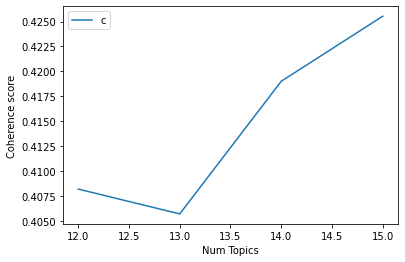

In [ ]:
# Show graph
limit=16; start=12; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 12  has Coherence Value of 0.4082
Num Topics = 13  has Coherence Value of 0.4057
Num Topics = 14  has Coherence Value of 0.419
Num Topics = 15  has Coherence Value of 0.4255


In [ ]:
model_list

In [ ]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.039*"ある" + 0.029*"いる" + 0.029*"県" + 0.028*"年" + 0.025*"よう" + 0.022*"なる" + '
  '0.020*"者" + 0.018*"農業" + 0.011*"する" + 0.011*"場"'),
 (1,
  '0.038*"県" + 0.035*"お" + 0.033*"点" + 0.028*"目" + 0.027*"質問" + 0.024*"す" + '
  '0.024*"つ" + 0.020*"する" + 0.011*"警察" + 0.011*"以上"'),
 (2,
  '0.045*"年度" + 0.031*"円" + 0.027*"事業" + 0.025*"つく" + 0.023*"予算" + 0.020*"国" + '
  '0.018*"県" + 0.017*"金" + 0.015*"化" + 0.014*"費"'),
 (3,
  '0.506*"委員" + 0.020*"書" + 0.020*"関する" + 0.019*"一般" + 0.019*"主な" + 0.017*"質疑" '
  '+ 0.016*"決算" + 0.014*"関係" + 0.012*"ヘーシ" + 0.011*"とうか"'),
 (4,
  '0.061*"つく" + 0.040*"伺う" + 0.035*"いる" + 0.024*"者" + 0.020*"県" + 0.018*"今後" + '
  '0.018*"ある" + 0.017*"よる" + 0.016*"月" + 0.015*"状況"'),
 (5,
  '0.051*"者" + 0.028*"県" + 0.020*"医療" + 0.019*"障害" + 0.018*"年" + 0.018*"ある" + '
  '0.015*"所" + 0.015*"人" + 0.013*"病院" + 0.012*"いる"'),
 (6,
  '0.048*"お" + 0.036*"本" + 0.031*"県" + 0.028*"おく" + 0.026*"知事" + 0.024*"する" + '
  '0.021*"尋ねる" + 0.021*"月" + 0.020*"いたす" + 0.019*"こう"'),
 (7,
  '0.035*"市

In [ ]:
import pyLDAvis.gensim_models 
import pickle 
import pyLDAvis
num_topics = 16
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/content/drive/MyDrive/Colab Notebooks/Amy_data/test/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
#topic_term_dists = topic_term_dists / topic_term_dists.sum(axis=1)[:, None]
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(optimal_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/content/drive/MyDrive/Colab Notebooks/Amy_data/test/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

AttributeError: ignored

# NMF

In [ ]:
!ls -la ~/.cache/matplotlib/tex.cache
#!fontlist-v330.json

In [ ]:
!rm ~/.cache/matplotlib/fontlist-v310.json

In [ ]:
!rm ~/.cache/matplotlib/tex.cache

In [ ]:
!apt install fonts-ipaexfont

In [ ]:
!fc-list | grep 'IPA'

In [ ]:
import matplotlib
print(matplotlib.matplotlib_fname())

In [ ]:
!fc-list | grep IPAexGothic

In [ ]:
import matplotlib.font_manager
fpath = "/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf"
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

In [ ]:
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',family='TakaoPGothic')

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'TakaoPGothic'

In [ ]:
from time import time
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
#fprop = fm.FontProperties("/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf")

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation


n_samples = 2000
n_features = 1000
n_components = 14
n_top_words = 20


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 7, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30},family="TakaoPGothic")
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40,family="TakaoPGothic")

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [ ]:

final = []
for l in data_lemmatized:
  t = " ".join(l)
  final.append(t)


In [ ]:
# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words=stop_words
)
t0 = time()


tfidf = tfidf_vectorizer.fit_transform(final)
print("done in %0.3fs." % (time() - t0))

In [ ]:

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words=stop_words
)
t0 = time()
tf = tf_vectorizer.fit_transform(final)
print("done in %0.3fs." % (time() - t0))
print()

In [ ]:
# Fit the NMF model
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
t0 = time()
nmf = NMF(n_components=n_components, random_state=1, alpha=0.1, l1_ratio=0.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
font = {'family':'TakaoPGothic'}
mpl.rc('font', **font)
plt.plot([0,1], [0,1])
plt.title('tofu - 豆腐 ー とうふ')
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='TakaoPGothic')
plt.plot([0,1], [0,1])
plt.title('tofu - 豆腐 ー とうふ')
plt.show()

In [ ]:
# Fit the NMF model
print(
    "\n" * 2,
    "Fitting the NMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha=0.1,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

In [ ]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)

In [ ]:
print(
    "\n" * 2,
    "Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

In [ ]:
tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

#NFM attempt 2

In [ ]:
# use tfidf by removing tokens that don't appear in at least 50 documents
vect = TfidfVectorizer(min_df=50, stop_words=stop_words)
 
# Fit and transform
X = vect.fit_transform(papers.Text)

In [ ]:
# Create an NMF instance: model
# the 10 components will be the topics
model = NMF(n_components=10, random_state=5)
 
# Fit the model to TF-IDF
model.fit(X)
 
# Transform the TF-IDF: nmf_features
nmf_features = model.transform(X)

In [ ]:
X.shape

In [ ]:
nmf_features.shape

In [ ]:
model.components_.shape

In [ ]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=vect.get_feature_names())
components_df

In [ ]:
for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')